In [12]:
import coi_maps
import fetch
import geopandas as gpd
from tqdm import tqdm

In [2]:
# pull csv down from endpoints
ids_url = "https://kkttgpf0ja.execute-api.us-east-2.amazonaws.com/citygate/submissions/districtr-ids/michigan"
coi_url = "https://kkttgpf0ja.execute-api.us-east-2.amazonaws.com/citygate/submissions/csv/michigan?type=coi&length=100000"

coi_df = fetch.coi_submissions(ids_url, coi_url)

In [4]:
cois = coi_maps.assignment_to_shape(coi_df)

Projecting into crs 6493
13 submissions using precincts
331 submissions using blockgroups
Empty plan...
Empty plan...
Empty plan...
Empty plan...
Empty plan...
Empty plan...
Empty plan...
Empty plan...
Empty plan...
Empty plan...
Empty plan...
Empty plan...
Empty plan...
Empty plan...
Empty plan...
Empty plan...
Empty plan...


In [5]:
cois.head()

id plan_id coi_id         tile_id  \
0  17892-0   17892      0  P0813400002027   
1  17892-0   17892      0  P0813400002026   
2  17892-0   17892      0  P0813400002032   
3  17892-0   17892      0  P0813400002038   
4  17892-0   17892      0  P0813400002029   

                                            geometry  
0  POLYGON ((5895841.467 -36103.185, 5895923.122 ...  
1  POLYGON ((5896114.833 -35746.544, 5896024.046 ...  
2  POLYGON ((5895497.987 -37304.043, 5895423.789 ...  
3  POLYGON ((5893506.774 -36038.459, 5893592.942 ...  
4  POLYGON ((5894699.274 -36390.135, 5894698.732 ...

In [6]:
# Number of total communities submitted (>= number of submissions)
len(set(cois['id']))

409

In [7]:
dissolved = cois.dissolve('id')

<AxesSubplot:>

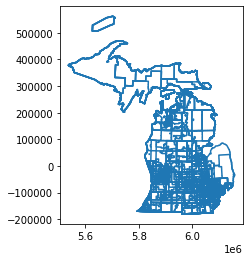

In [8]:
dissolved.boundary.plot()

In [9]:
dissolved = dissolved.drop('tile_id', axis = 1)
outfile = "../Michigan/mi_cois.shp"
dissolved.to_file(outfile)

In [10]:
dissolved.head()

geometry plan_id  coi_id
id                                                                        
17124-0  POLYGON ((6092159.513 -112292.300, 6092146.447...   17124       0
17128-0  POLYGON ((6093648.302 -111116.866, 6093662.632...   17128       0
17892-0  POLYGON ((5903403.856 -43996.435, 5903406.823 ...   17892       0
17892-1  MULTIPOLYGON (((5893376.882 -60112.985, 589328...   17892       1
18093-0  POLYGON ((5893709.220 -53662.998, 5893694.745 ...   18093       0

In [11]:
len(dissolved)

409

In [17]:
# to create one geojson per community
geojson_path = '../Michigan/geojsons'
for idx, row in tqdm(dissolved.iterrows(), total=len(dissolved)):
    gpd.GeoSeries(row['geometry']).to_file(f"{geojson_path}/{idx}.geojson", driver="GeoJSON")

100%|██████████| 409/409 [00:08<00:00, 47.39it/s]
